In [37]:
"""
Arquivo para leitura de saída do line constants do ATP quando solicitada Z_w da LT
revisão 00 - Leitura de LT subterrânea
"""

import math
import cmath
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


n = 0
diretorio = 0

while diretorio == 0:
    try:
        leitura = input('Digite o diretório do arquivo com seu nome e sua extensão \n'
                        'por exemplo: C:/Users/Matheus/Desktop/meuarquivo.lis: \n')
        arquivo = open(leitura, 'r', encoding='utf8')
    except:
        print('Há algo errado com o diretorio ou arquivo informados, verifique.')
    else:
        arquivo.close
        diretorio = 1

# Verifica número de circuitos e modos consequentemente

with open(leitura, 'r', encoding='utf8') as arquivo:
    texto = arquivo.readlines()
    for linha in texto:

        if 'Total # of conductors =' in linha:
            n = int(texto[texto.index(linha)][86:88])
            
    print(f'No arquivo indicado, há {n} condutores, portanto, haverá {n} modos de propagação.')

    freq = []
    zc = [[numero for numero in range(1, 1)] for valor in range(0, n)]
    # resistencia = defaultdict(lambda: [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)])
    # indutancia = defaultdict(lambda: [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)])
    # capacitancia = defaultdict(lambda: [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)])
    mod_zc = [[numero for numero in range(1, 1)] for valor in range(0, n)]
    angle_zc = [[numero for numero in range(1, 1)] for valor in range(0, n)]
    vel = [[numero for numero in range(1, 1)] for valor in range(0, n)]
    alfa = [[numero for numero in range(1, 1)] for valor in range(0, n)]
    t_i = defaultdict(lambda: [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)])
    mod_t_i = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]
    angle_t_i = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]
    # r_fase = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]
    # l_fase = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]
    # c_fase = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]

    cont = 0
    for linha in texto:

        if '=====================  Begin next frequency of scan.' in linha:
            # Guarda frequência de cálculo
            freq.append(float(linha[23:37]))
                        
            for j in range(n):
                # Guarda impedância característica em ohm
                zc[j].append(float(texto[texto.index(linha) + 143 + j][83:91]) +
                             float(texto[texto.index(linha) + 143 + j][93:101])*1j)

#                zc_real[j].append(float(texto[texto.index(linha)+3+j][49:61]))
#                zc_imag[j].append(float(texto[texto.index(linha) + 3 + j][62:75]))
                # Guarda velocidade em km/s
                vel[j].append(float(texto[texto.index(linha) + 143 + j][22:29]) * 1000)
                # Guarda a atenuação em dB/km
                alfa[j].append(float(texto[texto.index(linha) + 143 + j][6:19]))
                
                                
            #print(freq)

            # Guarda Matrizes de transformação modal
            if n <= 6:
                for i in range(n):
                    for k in range(n):
                        t_i[freq[cont]][i][k] = float(texto[texto.index(linha) + 103 + 3 * i][(0 + 10 * k):(10 + 10 * k)]) + \
                                                float(texto[texto.index(linha) + 104 + 3 * i][(0 + 10 * k):(10 + 10 * k)]) * 1j

            #else:
            #    for i in range(n):
            #        for k in range(n):
            #            if k < 6:
            #                t_i[freq[cont]][i][k] = float(texto[texto.index(linha) + 5 + n + 2*i][(0 + 22 * k):(22 + 22 * k)]) + \
            #                                        float(texto[texto.index(linha) + 6 + 3 * n + 2*i][(0 + 22 * k):(22 + 22 * k)]) * 1j
            #            else:
            #                t_i[freq[cont]][i][k] = float(texto[texto.index(linha) + 6 + n + 2*i][(0 + 22 * (k-6)):(22 + 22 * (k-6))]) + \
            #                                        float(texto[texto.index(linha) + 7 + 3 * n + 2*i][(0 + 22 * (k-6)):(22 + 22 * (k-6))]) * 1j

            cont = cont + 1
    

Digite o diretório do arquivo com seu nome e sua extensão 
por exemplo: C:/Users/Matheus/Desktop/meuarquivo.lis: 
C:\Users\Matheus\Google Drive\Sispot\Zw_LTs\fl_400_zw.lis
No arquivo indicado, há 6 condutores, portanto, haverá 6 modos de propagação.


O arquivo .lis informado foi lido. O que deseja fazer?
1 - Imprimir as matrizes de transformação T_i e sua inversa para uma frequência especificada 
2 - Plotar as velocidades e atenuações modais 
3 - Plotar as impedâncias características modais 
4 - Plotar os elementos da matriz T_i 
6 - Sair 
2


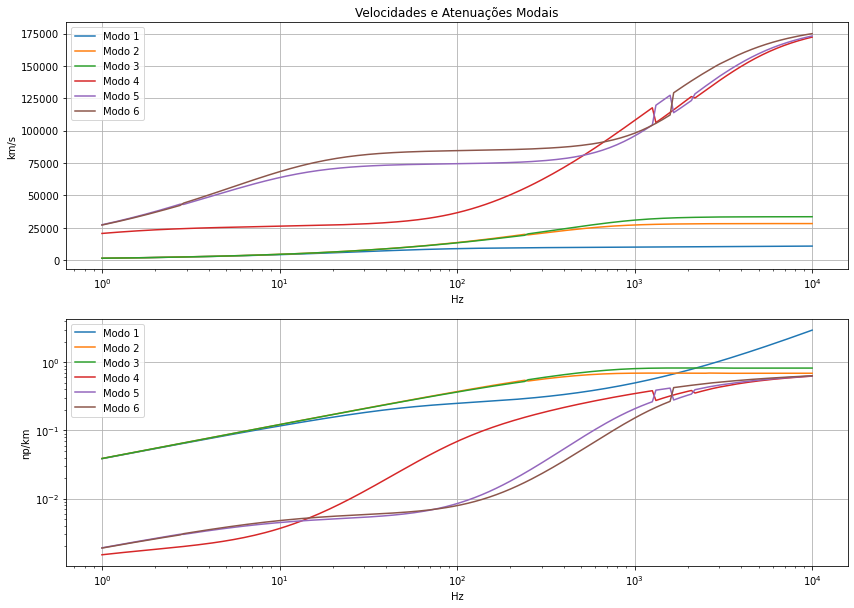

O arquivo .lis informado foi lido. O que deseja fazer?
1 - Imprimir as matrizes de transformação T_i e sua inversa para uma frequência especificada 
2 - Plotar as velocidades e atenuações modais 
3 - Plotar as impedâncias características modais 
4 - Plotar os elementos da matriz T_i 
6 - Sair 
3


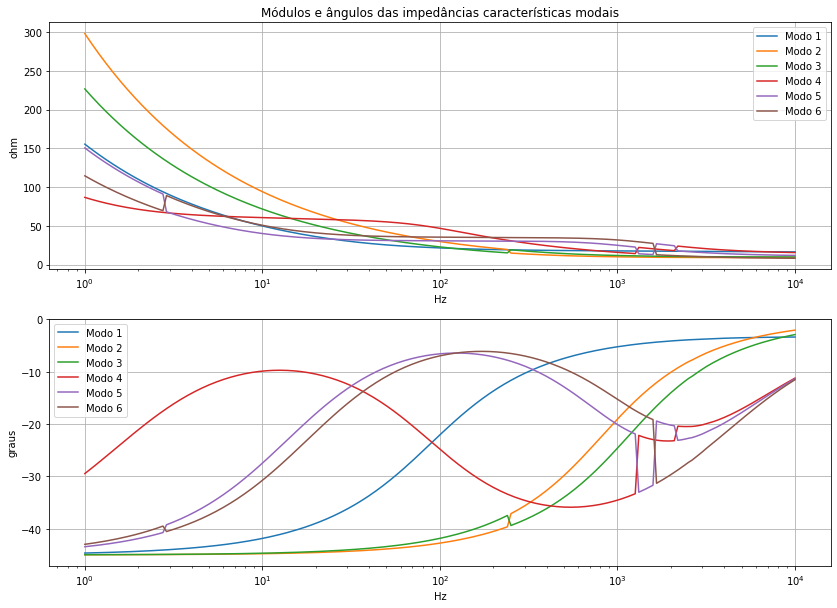

O arquivo .lis informado foi lido. O que deseja fazer?
1 - Imprimir as matrizes de transformação T_i e sua inversa para uma frequência especificada 
2 - Plotar as velocidades e atenuações modais 
3 - Plotar as impedâncias características modais 
4 - Plotar os elementos da matriz T_i 
6 - Sair 
6


In [38]:
entrada = 99

while entrada != 6:
    try:
        entrada = int(input('O arquivo .lis informado foi lido. O que deseja fazer?\n'
                            '1 - Imprimir as matrizes de transformação T_i e sua inversa para uma frequência especificada \n'
                            '2 - Plotar as velocidades e atenuações modais \n'
                            '3 - Plotar as impedâncias características modais \n'
                            '4 - Plotar os elementos da matriz T_i \n'
                            '6 - Sair \n'))

        if entrada == 6:
            break

        elif entrada == 1:
            indice_freq = 1
            while indice_freq != -1:
                try:
                    print(f'O vetor que possui todas as frequências escaneadas é dado por: \n {freq}')
                    indice_freq = int(input('Informe o índice do vetor de frequências a ser verificado em T_i \n'
                                            f'Os índices variam de 0 para a primeira posição até {len(freq)-1}'
                                            f' para a última (-1 para sair): \n'))
                    if indice_freq == -1:
                        break
                    else:
                        print(f'Para o índice escolhido ({indice_freq}), a matriz de transformação modal associada'
                              f' refere-se à frequência {freq[indice_freq]} Hz e é dada por: \n')

                        # Imprime matriz t_i escolhida
                        t_i_num = np.array(t_i[freq[indice_freq]])
                        for linha in range(len(t_i[freq[indice_freq]])):
                            print(f'linha {linha + 1}: {t_i_num[linha]}')

                        print('A matriz inversa de T_i é dada por: ')

                        # Imprime matriz inversa de t_i escolhida
                        inv_t_i = np.linalg.inv(np.array(t_i[freq[indice_freq]]))
                        for linha in range(len(t_i[freq[indice_freq]])):
                            print(f'linha {linha + 1}: {inv_t_i[linha]}')

                        print('\n')

                except (ValueError, IndexError):
                    print(f'Entre com um valor inteiro entre 0 e {len(freq)-1}.')

        elif entrada == 2:
            plt.figure(figsize=(14, 10))
            # Imprime velocidades modais
            plt.subplot(2, 1, 1)

            for i in range(len(vel)):
                plt.plot(freq, vel[i], label=f'Modo {i+1}')

            plt.legend(loc=0)
            plt.ylabel('km/s')
            plt.xlabel('Hz')
            plt.xscale('log')
            plt.grid(True)
            plt.title('Velocidades e Atenuações Modais')

            # Imprime atenuações modais
            plt.subplot(2, 1, 2)

            for i in range(len(alfa)):
                plt.plot(freq, alfa[i], label=f'Modo {i+1}')

            plt.legend(loc=0)
            plt.ylabel('np/km')
            plt.xlabel('Hz')
            plt.xscale('log')
            plt.yscale('log')
            plt.grid(True)
                      
            plt.savefig('velocidades_e_atenuacoes.png')
            
            plt.show()

        elif entrada == 3:
            # Imprime Impedâncias Características Modais
            for i in range(n):
                for j in zc[i]:
                    mod_zc[i].append(abs(j))
                    angle_zc[i].append(cmath.phase(j)*180/math.pi)

            plt.figure(figsize=(14, 10))

            # Imprime Módulo em ohm
            plt.subplot(2, 1, 1)

            for i in range(len(mod_zc)):
                plt.plot(freq, mod_zc[i], label=f'Modo {i+1}')

            plt.legend(loc=0)
            plt.ylabel('ohm')
            plt.xlabel('Hz')
            plt.xscale('log')
            plt.grid(True)
            plt.title('Módulos e ângulos das impedâncias características modais')

            # Imprime ângulo em graus
            plt.subplot(2, 1, 2)

            for i in range(len(angle_zc)):
                plt.plot(freq, angle_zc[i], label=f'Modo {i+1}')

            plt.legend(loc=0)
            plt.ylabel('graus')
            plt.xlabel('Hz')
            plt.xscale('log')
            plt.grid(True)
            
            plt.savefig('impedancias_e_atenuacoes.png')

            plt.show()

            mod_zc = [[numero for numero in range(1, 1)] for valor in range(0, n)]
            angle_zc = [[numero for numero in range(1, 1)] for valor in range(0, n)]

        elif entrada == 4:
            # Imprime autovetores (matriz T_i)
            for i in range(n):
                for j in range(n):
                    for f in freq:
                        mod_t_i[i][j].append(abs(t_i[f][i][j]))
                        angle_t_i[i][j].append(cmath.phase(t_i[f][i][j])*180/math.pi)

            # Gráficos sempre divididos em 3 por figura e cada gráfico possui uma linha da matriz T_i
            # O número de figuras geradas será igual ao número de circuitos

            # Imprime módulos de T_i
            for i in range(len(mod_t_i)):
                if i == 0 or i % 3 == 0:
                    plt.figure()
                    plt.subplot(1, 3, 1)
                elif i == 1 or i % 3 == 1:
                    plt.subplot(1, 3, 2)
                    plt.title('Módulos dos elementos de T_i')
                elif i == 2 or i % 3 == 2:
                    plt.subplot(1, 3, 3)
                for j in range(len(mod_t_i)):
                    plt.plot(freq, mod_t_i[i][j], label=f'T_i({i+1},{j+1}')
                    plt.legend(loc=0)
                    plt.xlabel('Hz')
                    plt.xscale('log')
                    plt.grid(True)

            # Imprime ângulos de T_i
            for i in range(len(angle_t_i)):
                if i == 0 or i % 3 == 0:
                    plt.figure()
                    plt.subplot(1, 3, 1)
                elif i == 1 or i % 3 == 1:
                    plt.subplot(1, 3, 2)
                    plt.title('Ângulos dos elementos de T_i')
                elif i == 2 or i % 3 == 2:
                    plt.subplot(1, 3, 3)
                for j in range(len(angle_t_i)):
                    plt.plot(freq, angle_t_i[i][j], label=f'T_i({i+1},{j+1}')
                    plt.legend(loc=0)
                    plt.xlabel('Hz')
                    plt.ylabel('graus')
                    plt.xscale('log')
                    plt.ylim([-190, 190])
                    plt.grid(True)

            plt.show()

            mod_t_i = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]
            angle_t_i = [[[numero for numero in range(1, 1)] for linha in range(0, n)] for coluna in range(0, n)]

        else:
            print('Digite um número entre 1 e 5, conforme índice acima, ou digite 6 para sair.')

    except ValueError:
        print('Digite um número entre 1 e 5, conforme índice acima, ou digite 6 para sair.')

